In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bacteria_data=pd.read_csv("data/M142_Homework1_Data.csv")
bacteria_data

,Time (hours),Yeast Cell Count
0,0,9.6
1,1,18.3
2,2,29.0
3,3,47.2
4,4,71.1
5,5,119.1
6,6,174.6
7,7,257.3
8,8,350.7
9,9,441.0


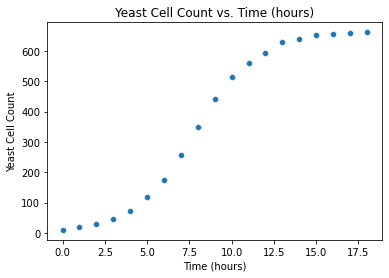

In [48]:
sns.scatterplot(data=bacteria_data,x="Time (hours)",y="Yeast Cell Count")
plt.title("Yeast Cell Count vs. Time (hours)")
plt.savefig("Q_4_Hw_1_142_a.png")

In [10]:
bacteria_exp=bacteria_data[bacteria_data["Time (hours)"]<10]

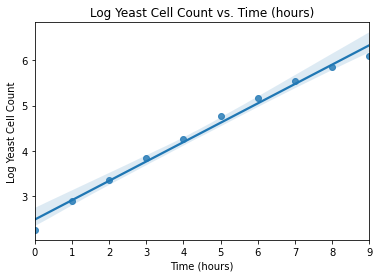

In [50]:
sns.regplot(data=bacteria_exp,x=bacteria_exp["Time (hours)"],y=np.log(bacteria_exp["Yeast Cell Count"]))
plt.ylabel("Log Yeast Cell Count")
plt.title("Log Yeast Cell Count vs. Time (hours)")
plt.savefig("Q_4_Hw_1_142_b.png")

In [21]:
fit=np.exp(np.polyfit(bacteria_exp["Time (hours)"],np.log(bacteria_exp["Yeast Cell Count"]),1))
fit

array([ 1.5328075 , 12.03305581])

In [40]:
corr=np.corrcoef(bacteria_exp["Time (hours)"], np.log(bacteria_exp["Yeast Cell Count"]))
corr[1][0]

0.9944986908084287

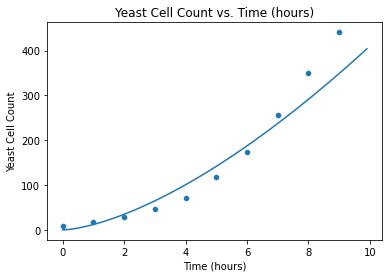

In [49]:
x_0=np.arange(0,10,0.1)
y_0=fit[1]*np.power(x_0,fit[0])
sns.lineplot(x=x_0,y=y_0)
sns.scatterplot(data=bacteria_exp,x=bacteria_exp["Time (hours)"],y=bacteria_exp["Yeast Cell Count"])
plt.title("Yeast Cell Count vs. Time (hours)")
plt.savefig("Q_4_Hw_1_142_c.png")

In [25]:
r_0=np.array([])
for x in np.arange(len(bacteria_data)):
    if x==18:
        r_0=np.append(r_0,0)
    else:
        r_0=np.append(r_0,(bacteria_data["Yeast Cell Count"][x+1]-bacteria_data["Yeast Cell Count"][x])/bacteria_data["Yeast Cell Count"][x])
     

In [26]:
bacteria_data["R_0(N_k)"]=r_0

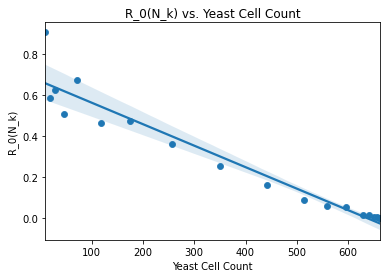

In [51]:
sns.scatterplot(data=bacteria_data,x="Yeast Cell Count",y="R_0(N_k)")
sns.regplot(data=bacteria_data,x="Yeast Cell Count",y="R_0(N_k)")
plt.title("R_0(N_k) vs. Yeast Cell Count")
plt.savefig("Q_4_Hw_1_142_d.png")

In [41]:
corr_2=np.corrcoef(bacteria_data["Yeast Cell Count"], bacteria_data["R_0(N_k)"])
corr_2[1][0]

-0.9652771067429227

In [38]:
fit_2=np.polyfit(bacteria_data["Yeast Cell Count"],bacteria_data["R_0(N_k)"],1)
fit_2

array([-0.00104662,  0.66844655])

In [43]:
k=-1*1/fit_2[0]
k

955.4535128353328